/workspaces/DL-Excersize/notebooks/DL3_20241006
/workspaces/DL-Excersize/notebooks
==================iteration:0================
SGD:2.356226156226696
Momentum:2.461129833330987
AdaGrad:2.391262489848974
Adam:2.204046286671743
==================iteration:100================
SGD:1.6737396838931748
Momentum:0.5555967978127871
AdaGrad:0.297266616906516
Adam:0.38916380268146
==================iteration:200================
SGD:0.8480062963281352
Momentum:0.2514019437328129
AdaGrad:0.07432189581101209
Adam:0.12684022778524973
==================iteration:300================
SGD:0.6447818191936978
Momentum:0.2779430547790812
AdaGrad:0.06739625594480679
Adam:0.11614998556848893
==================iteration:400================
SGD:0.3449762189616652
Momentum:0.10565937666134875
AdaGrad:0.040834655164608574
Adam:0.08589327271480043
==================iteration:500================
SGD:0.493876969081631
Momentum:0.1638529332963516
AdaGrad:0.0718745422457854
Adam:0.09085889841898097
==================

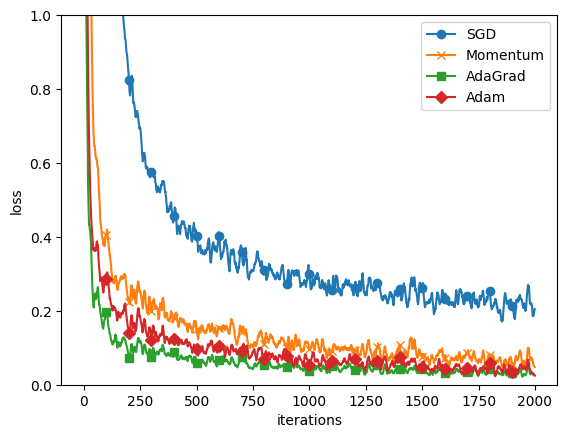

In [2]:
import os, sys
print(os.getcwd())
current_dir = os.path.dirname(os.getcwd())
print(current_dir)
os.chdir(current_dir)

import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *

# NMISH 데이터 읽기
(x_train, t_train), (x_test,t_test) = load_mnist(normalize=True)
train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000

#1. 실험용 설정
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
#optinizers['RMSprop'] = RMSprop()

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100,100,100,100],output_size=10)
    train_loss[key] = [] 


#2.훈련시작
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)

        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)

    if i % 100 == 0:
        print("==================" + 'iteration:' + str(i) + '================')
        for key in optimizers.keys():
            loss= networks[key].loss(x_batch, t_batch)
            print(key + ':' + str(loss))

#3.그래프 그리기
markers = {'SGD':'o','Momentum':'x','AdaGrad':'s','Adam':'D'}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x,smooth_curve(train_loss[key]),marker=markers[key],markevery=100,label=key)
plt.xlabel('iterations')
plt.ylabel('loss')
plt.ylim(0,1)
plt.legend()
plt.show()
